In [166]:
%load_ext autoreload
%autoreload 2
import cbc, numpy as np, scipy as sp, matplotlib.pyplot as plt
from matplotlib import cm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
waist = 1e-5
wavelength = 1.5e-7
a, b, c = 2e-5, 2.5e-5, 3e-5
Nx, Ny, Nz = 20, 20, 21
detNx, detNy = 512, 512
pix_size = 55e-3 / 4
det_dist = 54

In [7]:
def thdiv(waist, wavelength):
    return wavelength / np.pi / waist

def zR(waist, wavelength):
    return np.pi * waist**2 / wavelength

def wz(z, waist, wavelength):
    return waist * np.sqrt(1 + (z / zR(waist, wavelength)**2))

In [8]:
axis = np.random.rand(3)
theta = 2 * np.pi * np.random.random()

In [9]:
latargs = cbc.lat_args(a=a, b=b, c=c, Nx=Nx, Ny=Ny, Nz=Nz)
koutargs = cbc.kout_args(det_dist=det_dist, detNx=detNx, detNy=detNy, pix_size=pix_size)
diff = cbc.diff(lat_args=latargs, kout_args=koutargs, waist=waist, wavelength=wavelength)
diff.move_lat()

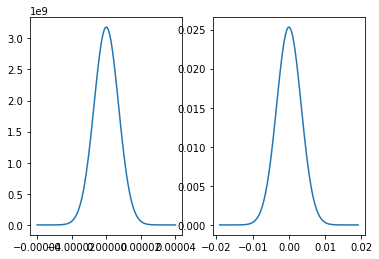

In [10]:
%matplotlib inline
pts = np.zeros((100,3))
pts[:,0] = np.linspace(-4 * waist, 4 * waist, 100)
us = np.abs(cbc.gaussian(pts, waist, wavelength))
ks = np.zeros((100,2))
ks[:,0] = np.linspace(-4 * thdiv(waist, wavelength), 4 * thdiv(waist, wavelength), 100)
ufs = np.abs(cbc.gaussian_f(ks, 0, waist, wavelength))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(pts[:,0], us)
ax2.plot(ks[:,0], ufs)
plt.show()

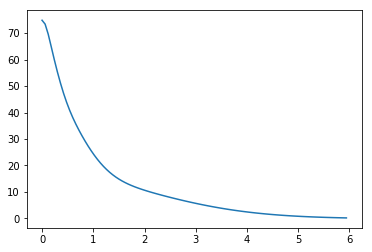

In [11]:
%matplotlib inline
ss = np.linspace(0, 6.0, 100, endpoint=False)
asfs = cbc.asf_vals(ss, cbc.asf_coeffs())
plt.plot(ss, asfs)
plt.show()

In [12]:
def normal(x, mu, sigma):
    return (np.pi * sigma**2)**-0.5 * np.exp(-(x - mu)**2 / sigma**2)

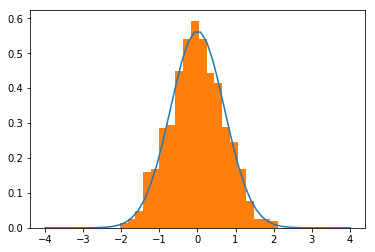

0.3956874583230272


In [13]:
%matplotlib inline
num = 1000
mu = 0
sigma = 1
pts = np.random.normal(mu, sigma / np.sqrt(2), num)
xs = np.linspace(-4 * sigma, 4 * sigma)
fs = normal(xs, mu, sigma)
plt.plot(xs, fs)
plt.hist(pts, 20, density=True)
plt.show()
print(normal(pts, mu, sigma).sum() / num)

In [14]:
knum = 1000
z = 0
ks = cbc.gaussian_dist(knum, z, waist, wavelength)[:, 0:2]
thdiv(waist,wavelength) * np.pi**0.5 / (2 * np.pi)**2 * cbc.gaussian_f(ks, z, waist, wavelength).sum() / knum

(3.85983067557349e-06+0j)

In [106]:
def gaus_dist(kxs, kys, waist, wavelength):
    thdiv = wavelength / np.pi / waist
    return np.pi**-1 * thdiv**-2 * np.exp(-(kxs**2 + kys**2) / thdiv**2)

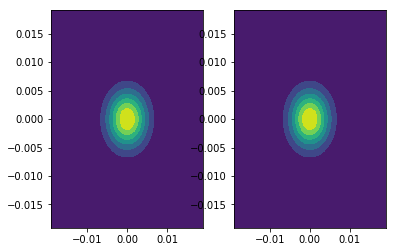

In [139]:
%matplotlib inline
knum = 100000
mus = np.zeros(2)
sigma = thdiv(waist, wavelength)
cov = [[sigma**2 / 2, 0], [0, sigma**2 / 2]]
rv = sp.stats.multivariate_normal(mean=mus, cov=cov)
_kxs = np.linspace(-4 * sigma, 4 * sigma)
kxs, kys = np.meshgrid(_kxs, _kxs)
ks = np.empty(kxs.shape + (2,))
ks[:, :, 0] = kxs; ks[:, :, 1] = kys
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.contourf(kxs, kys, gaus_dist(kxs, kys, waist, wavelength))
ax2.contourf(kxs, kys, rv.pdf(ks))

In [ ]:
ks1 = np.random.multivariate_normal(mus, cov, knum)
ks2 = cbc.gaussian_dist(knum, 0, waist, wavelength)[:, 0:2]
print(
    thdiv(waist, wavelength),
    np.sqrt((ks1**2).sum(axis=-1)).sum(axis=-1) / knum * 2 / np.sqrt(np.pi),
    np.sqrt((ks2**2).sum(axis=-1)).sum(axis=-1) / knum * 2 / np.sqrt(np.pi),
sep='\n')

In [ ]:
%matplotlib inline
knum = 100
_ks = np.linspace(-4 * thdiv(waist, wavelength), 4 * thdiv(waist, wavelength), 100)
kxs, kys = np.meshgrid(_ks, _ks)
ks = np.empty(kxs.shape + (2,))
ks[:,:,0] = kxs; ks[:,:,1] = kys
qs = np.random.multivariate_normal(mus, cov, knum)[np.newaxis,np.newaxis,:] - ks[:,:,np.newaxis]
fs = rv.pdf(qs).sum(axis=-1)
plt.pcolor(kxs, kys, fs, cmap=cm.plasma, vmin=0.0, vmax=fs.max())
plt.colorbar()
plt.show()

In [ ]:
knum = 100
_ks = np.linspace(-4 * thdiv(waist, wavelength), 4 * thdiv(waist, wavelength), 100)
kxs, kys = np.meshgrid(_ks, _ks)
